In [2]:
# Initializations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.family':'serif'})
mpl.rcParams.update({'font.serif':'STIXGeneral'})
mpl.rcParams.update({'axes.titlesize': 20})
mpl.rcParams.update({'axes.labelsize': 28})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 16})
mpl.rcParams.update({'ytick.labelsize': 16})
mpl.rcParams.update({'legend.framealpha': 1})
mpl.rcParams.update({'axes.titlepad': 12})
mpl.rcParams.update({'figure.dpi': 100})

## Regression plot function

In [3]:
def plot_regression(D_in, D_pred, coord=None, title=None, save_fig=False):
    
    
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['axes.labelsize'] = 22
    plt.rcParams['axes.titlesize'] = 14

    # generate the best fit for the predicted data ___________________
    lim1 = np.mean(D_in) - 3.5*np.std(D_in)
    lim2 = np.mean(D_in) + 3.5*np.std(D_in)
    lim3 = np.mean(D_pred) - 2*np.std(D_pred)

    reg2 = LinearRegression()
    reg2.fit(D_in.reshape(-1,1), D_pred.reshape(-1,1))
    D_vec = np.linspace(lim1, lim2, 100).reshape(-1,1)
    D_reg2 = reg2.predict(D_vec)
    
    # Plots _____________________
    fig, ax1 = plt.subplots(figsize=(4,4), tight_layout=True)
    
    ax1.scatter(D_in, D_pred,
                marker='o',
                s=10, linewidth=0.4,
                alpha=0.5,
                edgecolor='black', facecolor='white')
    ax1.plot([lim1, lim2], [lim1, lim2], linestyle='-', color='red', linewidth=2.5, alpha=0.3)
#     ax1.plot(D_vec, D_reg2, linestyle='-', color='black', linewidth=2.5, alpha=0.1)
    
    ax1.set_aspect('equal')
    
    if coord != None:
        if coord == 'F_x':
            ax1.set_xlabel('$\Delta F_{x,DNS}$', labelpad=15)
            ax1.set_ylabel('$\Delta F_{x,MPP}$', labelpad=10)
        elif coord == 'F_y':
            ax1.set_xlabel('$\Delta F_{y,DNS}$', labelpad=15)
            ax1.set_ylabel('$\Delta F_{y,MPP}$', labelpad=10)
        elif coord == 'T_z':
            ax1.set_xlabel('$\Delta T_{z,DNS}$', labelpad=15)
            ax1.set_ylabel('$\Delta T_{z,MPP}$', labelpad=10)
    
    ax1.set_xlim((1.0*lim1, 1.0*lim2))
    ax1.set_ylim((1.0*lim1, 1.0*lim2))

    #     ax1.set_xticks(range(-4,5,1))
    #     ax1.set_yticks(range(-4,5,1))

    # R^2 on plot _____________________
    x_ann = ax1.get_xlim()[1] - 0.05*(plt.xlim()[1]-plt.xlim()[0])
    y_ann = ax1.get_ylim()[0] + 0.05*(plt.ylim()[1]-plt.ylim()[0])
    ax1.annotate(str(r'$\mathrm{R^2} = ' + f'{r2_score(D_in, D_pred):.2f}$'), 
                 xy=(x_ann, y_ann),
                 horizontalalignment='right',
                 verticalalignment='bottom',
                 fontsize=18);

    # ticks _____________________
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator)
    
    ax1.xaxis.set_major_locator(MaxNLocator(5))
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    ax1.yaxis.set_major_locator(MaxNLocator(5))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
    
    ax1.tick_params(which='major', length=5)
    ax1.tick_params(which='minor', length=2)
    
    # Set the font name for axis tick labels _____________________
    for tick in ax1.get_xticklabels():
        tick.set_fontname('Times New Roman')
    for tick in ax1.get_yticklabels():
        tick.set_fontname('Times New Roman')
        
    if title != None:
        ax1.set_title(title)
        
    if save_fig:
        fig.savefig('Rsq_Fy_Re2_phi02.pdf', bbox_inches='tight')
    
    return None

# plot_regression(coord=coord, title=title, save_fig=True)

## Contour plot function

In [4]:
def plot_PDF(x1, x2, ff, title=None, savefig=False):
    '''
    This function plots the contour of the PDFs according to a
    meshgrid and values of contour.
    '''
    
    # Plot using stats KDE _________________________________________
    fig, ax1 = plt.subplots(figsize=(4, 4), tight_layout=True)
    
    mid_plane = int(grid_n.imag / 2)
    
    contour = ax1.contourf(x1[:, :, mid_plane], x2[:, :, mid_plane],
                            np.reshape(ff, x1.shape)[:, :, mid_plane],
                            cmap='jet',
                            levels=np.linspace(0, ff.max(), 20), extend='both',
                            zorder=0)

#     contour = ax1.contourf(x1[mid_plane, :, :], x2[mid_plane, :, :],
#                             np.reshape(ff, x1.shape)[mid_plane, :, :],
#                             cmap='jet',
#                             levels=np.linspace(0, ff.max(), 30), extend='both',
#                             zorder=0)

    circ1 = plt.Circle((0,0), radius=0.5,
                       alpha=1,
                       facecolor='none',
                       edgecolor='black',
                       linewidth=2,
                       zorder=2)
    ax1.add_patch(circ1)

    ax1.set_aspect('equal')

    ax1.set_xticks(range(-4,5,1))
    ax1.set_yticks(range(-4,5,1))

    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.tick_params(which='major', length=5)
    ax1.tick_params(which='minor', length=4)

    ax1.set_xlabel('$ x $')
    ax1.set_ylabel('$ y $')
    
    if title != None:
        ax1.set_title(title, fontsize=20)
        
#         ax1.set_title(r'$ \tilde{p} \left( \cup_{j=1}^' +\
#                       f'{num_p_incl}' +\
#                       r'\mathbf{r}_j \: \vert \: \Delta F_x > 0 \right) $', fontsize=17)
#         ax1.set_title(r'$ \tilde{p}_1 \left( \mathbf{r}_{' + f'{num_p_incl}' + r'} \: \vert \: \Delta T_z < -\sigma \right) $')

    ax1.vlines(x=0, ymin=yy.min(), ymax=yy.max(), color='white', linewidth=0.75, zorder=1)
    ax1.hlines(y=0, xmin=xx.min(), xmax=xx.max(), color='white', linewidth=0.75, zorder=1)

    # Color bar________________________________
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.2)
    cb = fig.colorbar(contour, cax=cax, format='%.3f', extendrect=True)

    from matplotlib.ticker import FormatStrFormatter
    cb.ax.tick_params(labelsize=14)

    for l in cb.ax.yaxis.get_ticklabels():
        l.set_family('Times New Roman')

    # Set the font name for axis tick labels______________
    for tick in ax1.get_xticklabels():
        tick.set_fontname('Times New Roman')
    for tick in ax1.get_yticklabels():
        tick.set_fontname('Times New Roman')

    # remove white lines separating the contours_______________
    for c in contour.collections:
        c.set_edgecolor('face')

    # Adjust number of ticks in colorbar
    from matplotlib import ticker
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    
    if savefig:
        fig.savefig('PDF.pdf', bbox_inches='tight')

# PDF using KDEs

full dataset size = (3000, 150)
N_sample = 14650


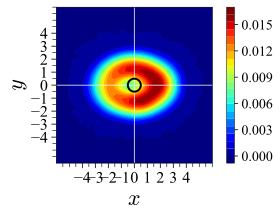

In [76]:
%matplotlib inline
from matplotlib.patches import Circle

grid_n = 50j
# load dataset
# dataset = pd.read_csv('../dataset/Re40_phi01_45000',
#                       header=None, delim_whitespace=True).values
dataset = pd.read_csv('../dataset/Re40_phi01_ellipsoid_1.5',
                      header=None, delim_whitespace=True).values

X = dataset[::1, :np.size(dataset,axis=1) - 6]
Y = dataset[::1, np.size(dataset, axis=1) - 3]

dF = Y - np.mean(Y)

print(f'full dataset size = {X.shape}')

num_p_incl = 10
bandwidth = 1.5
levels = 30
lim = 6
a = 0

X1_tmp = np.array([])
X2_tmp = np.array([])
X3_tmp = np.array([])

# This is for drag: _________________________________________
# condition = dF < -a * np.std(dF)
condition = dF > +a * np.std(dF)

# This is for lift and torque: _________________________________________
# condition = np.logical_or(
#     dF > +a * np.std(dF),
#     dF < -a * np.std(dF))

# for i_particle in [num_p_incl - 1]:
for i_particle in range(0, num_p_incl):
    X1, X2, X3 = X[:, 3*i_particle], X[:, 3*i_particle+1], X[:, 3*i_particle+2]
    
    X1_tmp = np.append(X1_tmp, X1[condition])
    X2_tmp = np.append(X2_tmp, X2[condition])
    X3_tmp = np.append(X3_tmp, X3[condition])
    
# symmetry for the plots have been enforced about the y-plane
# X1_tmp = np.append(X1_tmp, X1_tmp)
# X2_tmp = np.append(X2_tmp, -X2_tmp)
# X3_tmp = np.append(X3_tmp, X3_tmp)
    
# X1_tmp = np.append(X1_tmp, X1_tmp)
# X2_tmp = np.append(X2_tmp, X2_tmp)
# X3_tmp = np.append(X3_tmp, -X3_tmp)

print(f'N_sample = {X1_tmp.shape[0]}')

xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])
data = np.vstack([X1_tmp, X2_tmp, X3_tmp])

# KDE from scikit-learn _________________________
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=bandwidth,
                    metric='euclidean',
                    kernel='linear',
                    algorithm='ball_tree')
kde.fit(data.T)
f = np.reshape(np.exp(kde.score_samples(mesh.T)), xx.shape)

# KDE from scipy.stats _________________________
# from scipy.stats import gaussian_kde
# kde = gaussian_kde(data)
# kde.set_bandwidth(bandwidth * kde.scotts_factor())
# f = np.reshape(kde(mesh).T, xx.shape)

plot_PDF(xx, yy, f, savefig=False)

## Axisymmetric Torque PDF

full dataset size = (3000, 90)
N_sample = 2919


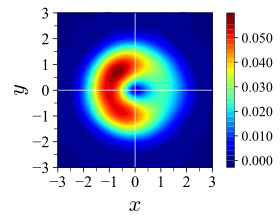

In [242]:
%matplotlib inline
from matplotlib.patches import Circle

# load dataset
# dataset = pd.read_csv('../dataset/Re40_phi01_45000',
#                       header=None, delim_whitespace=True).values
dataset = pd.read_csv('../dataset/Re40_phi01',
                      header=None, delim_whitespace=True).values

X = dataset[::1, :np.size(dataset,axis=1) - 6]
F_x = dataset[::1, [np.size(dataset, axis=1) - 6]]
F_y = dataset[::1, [np.size(dataset, axis=1) - 5]]
F_z = dataset[::1, [np.size(dataset, axis=1) - 4]]

dF_x = F_x - np.mean(F_x)
dF_y = F_y - np.mean(F_y)
dF_z = F_z - np.mean(F_z)

dF = np.hstack([dF_x, dF_y, dF_z])

print(f'full dataset size = {X.shape}')

num_p_incl = 5
bandwidth = 1
levels = 30
lim = 3
a = 1.

X1_tmp = np.array([])
X2_tmp = np.array([])
X3_tmp = np.array([])

# defining necessary vectors: _________________________________________
e_x = np.array([1, 0, 0])
e_y = np.array([0, 1, 0])
e_z = np.array([0, 0, 1])

# for i_particle in [num_p_incl - 1]:
for i_particle in range(0, num_p_incl):
    X1, X2, X3 = X[:, [3*i_particle]], X[:, [3*i_particle+1]], X[:, [3*i_particle+2]]
    
    e_r = np.hstack([X1, X2, X3])
    e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)
    
    e_n = np.cross(e_x, e_r)
    e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)
    
    dF_L = np.sum(dF * e_n, axis=1).reshape(-1, 1)
    
#     condition = dF_L < -a * dF_L.std()
    condition = dF_L > +a * dF_L.std()

    X1_tmp = np.append(X1_tmp, X1[condition])
    X2_tmp = np.append(X2_tmp, X2[condition])
    X3_tmp = np.append(X3_tmp, X3[condition])

print(f'N_sample = {X1_tmp.shape[0]}')

xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])
data = np.vstack([X1_tmp, X2_tmp, X3_tmp])

# KDE from scikit-learn _________________________
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=bandwidth,
                    metric='euclidean',
                    kernel='epanechnikov',
                    algorithm='ball_tree')
kde.fit(data.T)
f = np.reshape(np.exp(kde.score_samples(mesh.T)), xx.shape)

# KDE from scipy.stats _________________________
# from scipy.stats import gaussian_kde
# kde = gaussian_kde(data)
# kde.set_bandwidth(bandwidth * kde.scotts_factor())
# f = np.reshape(kde(mesh).T, xx.shape)

plot_PDF(xx, yy, f)

# Spherical Harmonics Regression

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.4118e+05                                    4.49e+06    
       1              3         7.4569e+04      8.67e+05       1.58e+00       3.20e+05    
       2              4         3.2015e+00      7.46e+04       3.16e+00       7.19e+02    
       3              7         4.8769e-02      3.15e+00       3.95e-01       7.96e+01    
       4              8         1.1230e-02      3.75e-02       7.91e-01       2.27e+01    
       5             11         4.8730e-03      6.36e-03       9.88e-02       1.25e+01    
       6             12         2.8062e-03      2.07e-03       9.88e-02       1.02e+00    
       7             13         2.2560e-03      5.50e-04       1.98e-01       1.88e-01    
       8             16         2.2477e-03      8.24e-06       2.47e-02       3.76e-02    
       9             18         2.2454e-03      2.37e-06       1.24e-02       2.20e-03    

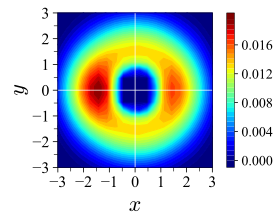

In [355]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.special import sph_harm as Y_sph
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn

grid_n = 20j

xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])
data = np.vstack([X1_tmp, X2_tmp, X3_tmp])

# KDE from scikit-learn _________________________
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=bandwidth,
                    metric='euclidean',
                    kernel='tophat',
                    algorithm='ball_tree')
kde.fit(data.T)
f = np.reshape(np.exp(kde.score_samples(mesh.T)), xx.shape)

def func(X,
         a01, b01,
         a02, b02,
         a11, b11,
         a12, b12,
         a21, b21,
         a22, b22,
         a31, b31,
         a32, b32,
         a41, b41,
         a42, b42,
         #========
         k01, q01,
         k11, q11,
         k21, q21,
         k02, q02,
         k12, q12,
         k22, q22,
         k31, q31,
         k32, q32,
         k41, q41,
         k42, q42,
        ):
    
    rmax = 7
    
    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(x / r)
    
    return  (
        (a01 * jn(0, k01 * r) + b01 * yn(0, q01 * r)) * Y_sph(0, 0, 0, theta).real +
        (a02 * jn(0, k02 * r) + b02 * yn(0, q02 * r)) * Y_sph(0, 0, 0, theta).real +
        (a11 * jn(1, k11 * r) + b11 * yn(1, q11 * r)) * Y_sph(0, 1, 0, theta).real +
        (a12 * jn(1, k12 * r) + b12 * yn(1, q12 * r)) * Y_sph(0, 1, 0, theta).real +
        (a21 * jn(2, k21 * r) + b21 * yn(2, q21 * r)) * Y_sph(0, 2, 0, theta).real +
        (a22 * jn(2, k22 * r) + b22 * yn(2, q22 * r)) * Y_sph(0, 2, 0, theta).real +
        (a31 * jn(3, k31 * r) + b31 * yn(3, q31 * r)) * Y_sph(0, 3, 0, theta).real +
        (a32 * jn(3, k32 * r) + b32 * yn(3, q32 * r)) * Y_sph(0, 3, 0, theta).real +
        (a41 * jn(4, k41 * r) + b41 * yn(4, q41 * r)) * Y_sph(0, 4, 0, theta).real +
        (a42 * jn(4, k42 * r) + b42 * yn(4, q42 * r)) * Y_sph(0, 4, 0, theta).real
    ) * np.heaviside(r - 0.7, 1) * np.heaviside(-(r - rmax), 1)

input_data = mesh.T
# f = np.exp(kde.score_samples(input_data))

opt, _ = curve_fit(func, input_data, f.flatten(),
                   method='trf',
                   ftol=1e-4,
                   xtol=None,
                   verbose=2
                  )

ff_fit = func(input_data, *opt)

print(f'\n-----------------\nR^2 = {r2_score(f.flatten(), ff_fit):.3f}')
plot_PDF(xx, yy, ff_fit)

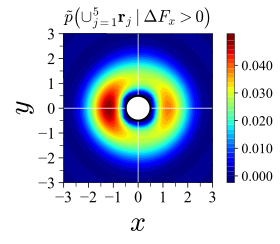

In [144]:
grid_n = 40j
xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])

ff_fit = func(mesh.T, *opt)
plot_PDF(xx, yy, ff_fit, title=True, savefig=True)

# MPP Model

## MPP Model for Drag with PDF from Spherical Harmonics

(3000, 90)
# of included particles: 15 out of 30
KDE method: scikit, with velocity = True
________________________________________
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4663e+05                                    6.65e+05    
       1              3         1.6280e+04      1.30e+05       1.58e+00       6.41e+04    
       2              4         1.4710e+01      1.63e+04       3.16e+00       8.04e+02    
       3              6         1.2189e-01      1.46e+01       1.58e+00       6.37e+01    
       4              8         2.3954e-02      9.79e-02       7.91e-01       1.15e+01    
       5             10         9.9881e-03      1.40e-02       3.95e-01       2.62e+00    
       6             13         7.5385e-03      2.45e-03       4.94e-02       8.60e-01    
       7             14         7.2795e-03      2.59e-04       9.88e-02       1.13e-01    
       8             16         7.2410e-03      3.

TypeError: plot_regression() missing 2 required positional arguments: 'D_in' and 'D_pred'

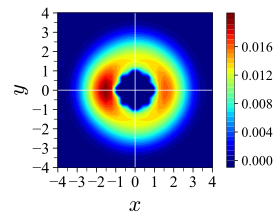

In [416]:
%reset -f array
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# load dataset _______________________________________
dataset = pd.read_csv('../dataset/Re40_phi01',
                      header=None, delim_whitespace=True).values

X_in = dataset[::1, :np.size(dataset, axis=1) - 6]
Y_in = dataset[::1,  np.size(dataset, axis=1) - 3]
Y_in -= np.mean(Y_in)

coord, title = 'F_x', '$ \mathrm{Re} = 40, \phi = 0.1 $'

num_p_incl = 15
levels = 30
grid_n = 30j
ftol = 1e-4
cond_factor = 0.1
with_velocity = True

lim = 4

KDE_method = 'scikit'
kernel = 'tophat'
bw_scikit = 0.8

# KDE_method = 'scipy'
# bw_scipy = 2

kf = KFold(n_splits=8, shuffle=True)

print(X_in.shape)
print(f'# of included particles: {num_p_incl} out of {int((X_in.shape[1] - 3) / 3) + 1}')
print(f'KDE method: {KDE_method}, with velocity = {with_velocity}')
print('________________________________________')

# This is where spherical harmonics regression is done for the PDF: ________________________________
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.special import sph_harm as Y_sph
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn

opt_list = []

# This is for drag: _________________________________________
for condition in [Y_in < -cond_factor * Y_in.std(), Y_in > cond_factor * Y_in.std()]:
    
    X1_tmp = np.array([])
    X2_tmp = np.array([])
    X3_tmp = np.array([])
    
    for i_particle in range(0, num_p_incl):
        X1, X2, X3 = X_in[:, 3*i_particle], X_in[:, 3*i_particle+1], X_in[:, 3*i_particle+2]

        X1_tmp = np.append(X1_tmp, X1[condition])
        X2_tmp = np.append(X2_tmp, X2[condition])
        X3_tmp = np.append(X3_tmp, X3[condition])

    xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
    mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])
    data = np.vstack([X1_tmp, X2_tmp, X3_tmp])

    # KDE from scikit-learn _________________________
    from sklearn.neighbors import KernelDensity
    kde = KernelDensity(bandwidth=bw_scikit,
                        metric='euclidean',
                        kernel='tophat',
                        algorithm='ball_tree')
    kde.fit(data.T)
    f = np.reshape(np.exp(kde.score_samples(mesh.T)), xx.shape)

    def func(X_input,
             a01, b01,
             a02, b02,
             a11, b11,
             a12, b12,
             a21, b21,
             a22, b22,
             a31, b31,
             a32, b32,
             a41, b41,
             a42, b42,
             #========
             k01, q01,
             k11, q11,
             k21, q21,
             k02, q02,
             k12, q12,
             k22, q22,
             k31, q31,
             k32, q32,
             k41, q41,
             k42, q42,
            ):

        rmax = 4

        x = X_input[:, 0]
        y = X_input[:, 1]
        z = X_input[:, 2]
        r = np.sqrt(x**2 + y**2 + z**2)
        theta = np.arccos(x / r)

        return  (
            (a01 * jn(0, k01 * r) + b01 * yn(0, q01 * r)) * Y_sph(0, 0, 0, theta).real +
            (a02 * jn(0, k02 * r) + b02 * yn(0, q02 * r)) * Y_sph(0, 0, 0, theta).real +
            (a11 * jn(1, k11 * r) + b11 * yn(1, q11 * r)) * Y_sph(0, 1, 0, theta).real +
            (a12 * jn(1, k12 * r) + b12 * yn(1, q12 * r)) * Y_sph(0, 1, 0, theta).real +
            (a21 * jn(2, k21 * r) + b21 * yn(2, q21 * r)) * Y_sph(0, 2, 0, theta).real +
            (a22 * jn(2, k22 * r) + b22 * yn(2, q22 * r)) * Y_sph(0, 2, 0, theta).real +
            (a31 * jn(3, k31 * r) + b31 * yn(3, q31 * r)) * Y_sph(0, 3, 0, theta).real +
            (a32 * jn(3, k32 * r) + b32 * yn(3, q32 * r)) * Y_sph(0, 3, 0, theta).real +
            (a41 * jn(4, k41 * r) + b41 * yn(4, q41 * r)) * Y_sph(0, 4, 0, theta).real +
            (a42 * jn(4, k42 * r) + b42 * yn(4, q42 * r)) * Y_sph(0, 4, 0, theta).real
        ) * np.heaviside(r - 1, 1) * np.heaviside(-(r - rmax), 1)

    input_data = mesh.T

    opt, _ = curve_fit(func, input_data, f.flatten(),
                       method='trf',
                       ftol=ftol, xtol=None,
                       verbose=2)

    ff_fit = func(input_data, *opt)

    print(f'________________________________________\n\
        R^2 = {r2_score(f.flatten(), ff_fit):2.4f}\n')
    
    plot_PDF(xx, yy, ff_fit)
    opt_list.append(opt)

# The MPP model using the PDF obtained from spherical harmonics regression ______________________
X_test_plot = np.zeros((0, X_in.shape[1]))
D_test_plot = np.zeros((0))
D_pred_plot = np.zeros((0))

train_scores = []
test_scores = []

# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in):
    
    X, X_test = X_in[train_index], X_in[test_index]
    Y, Y_test = Y_in[train_index], Y_in[test_index]
    
    D_in = Y
       
    # Constructing input variables ____________________________
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
            
    for j in range(0, num_p_incl):
        F_l = np.append(F_l, func(
            np.array([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).T, *opt_list[0]
        ).reshape(-1, 1), axis=1)
        F_h = np.append(F_h, func(
            np.array([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).T, *opt_list[1]
        ).reshape(-1, 1), axis=1)
        
    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((F_l, F_h, V_in))
    else:
        X_in_reg = np.hstack((F_l, F_h))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, D_in)
    D_pred = reg.predict(X_in_reg)  

    print(f'Training R^2\t= {r2_score(D_in, D_pred):.2f}\n')
    train_scores.append(r2_score(D_in, D_pred))
    
    # Testing _______________________________________________________________
    X = X_test
    D_in = Y_test
    
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        F_l = np.append(F_l, func(
            np.array([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).T, *opt_list[0]
        ).reshape(-1, 1), axis=1)
        F_h = np.append(F_h, func(
            np.array([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).T, *opt_list[1]
        ).reshape(-1, 1), axis=1)

    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((F_l, F_h, V_in))
    else:
        X_in_reg = np.hstack((F_l, F_h))
    
    D_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(D_in, D_pred_test):.2f}\n')
    test_scores.append(r2_score(D_in, D_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test))
    D_test_plot = np.concatenate((D_test_plot, Y_test))
    D_pred_plot = np.concatenate((D_pred_plot, D_pred_test))

# # Entire dataset ________________________
X = X_test_plot
D_in = D_test_plot
D_pred = D_pred_plot

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')

# plotting __________________________
plot_regression(D_in=D_in, D_pred=D_pred, coord=coord, title=title, save_fig=False)
plt.close('all')

## Original MPP model

Training R^2	= 0.66
Test R^2 	= 0.67

Training R^2	= 0.67
Test R^2 	= 0.64

Training R^2	= 0.67
Test R^2 	= 0.60

Training R^2	= 0.66
Test R^2 	= 0.65

Training R^2	= 0.66
Test R^2 	= 0.69

Training R^2	= 0.66
Test R^2 	= 0.63

Training R^2	= 0.66
Test R^2 	= 0.62

Training R^2	= 0.67
Test R^2 	= 0.64

<Training R^2> = 0.66
<Test R^2> = 0.64


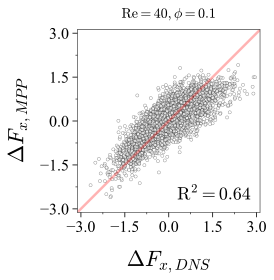

In [165]:
X_test_plot = np.zeros((0, X_in.shape[1]))
D_test_plot = np.zeros((0))
D_pred_plot = np.zeros((0))

train_scores = []
test_scores = []

# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in):
    
    X, X_test = X_in[train_index], X_in[test_index]
    Y, Y_test = Y_in[train_index], Y_in[test_index]
    
    D_in = Y
    
    q = -1
    kde_list = []
    
    for Z_i in [-1 * np.std(D_in), +1 * np.std(D_in)]:
        
        # Constructing KDEs ________________________________
        q += 1
        if q == 0:
            condition = D_in < -cond_factor * Z_i
        else:
            condition = D_in > +cond_factor * Z_i

        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X[:, 3*p], X[:, 3*p+1], X[:, 3*p+2]
            X1_tmp = np.append(X1_tmp, X1[condition])
            X2_tmp = np.append(X2_tmp, X2[condition])
            X3_tmp = np.append(X3_tmp, X3[condition])
            
        # symmetry conditions
        X1_tmp = np.append(X1_tmp, X1_tmp)
        X2_tmp = np.append(X2_tmp, -X2_tmp)
        X3_tmp = np.append(X3_tmp, X3_tmp)
        
        X1_tmp = np.append(X1_tmp, X1_tmp)
        X2_tmp = np.append(X2_tmp, X2_tmp)
        X3_tmp = np.append(X3_tmp, -X3_tmp)
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
            
        # KDE from scipy.stats _________________________
        if KDE_method == 'scipy':
            from scipy.stats import gaussian_kde
            kde_list.append(gaussian_kde(data))
            bw = bw_scipy * kde_list[q].scotts_factor()
            kde_list[q].set_bandwidth(bw)
            
        # KDE from scikit-learn _________________________
        elif KDE_method == 'scikit':
            from sklearn.neighbors import KernelDensity
            kde = KernelDensity(bandwidth=bw_scikit,
                                metric='euclidean',
                                kernel=kernel,
                                algorithm='ball_tree')
            kde.fit(data.T)
            kde_list.append(kde)
    
    # Constructing input variables ____________________________
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        F_l = np.append(F_l, np.exp( kde_list[0].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] 
                      )).T )).reshape(-1,1), axis=1)
        F_h = np.append(F_h, np.exp( kde_list[1].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] 
                      )).T )).reshape(-1,1), axis=1)
        
    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((F_l, F_h, V_in))
    else:
        X_in_reg = np.hstack((F_l, F_h))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, D_in)
    D_pred = reg.predict(X_in_reg)  
#     reg.coef_
    
    print(f'Training R^2\t= {r2_score(D_in, D_pred):.2f}')
    train_scores.append(r2_score(D_in, D_pred))
    
    # Testing _______________________________________________________________
    X = X_test
    D_in = Y_test
    
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        F_l = np.append(F_l, np.exp( kde_list[0].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] 
                      )).T )).reshape(-1,1), axis=1)
        F_h = np.append(F_h, np.exp( kde_list[1].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] 
                      )).T )).reshape(-1,1), axis=1)

    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((F_l, F_h, V_in))
    else:
        X_in_reg = np.hstack((F_l, F_h))
    
    D_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(D_in, D_pred_test):.2f}\n')
    test_scores.append(r2_score(D_in, D_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test))
    D_test_plot = np.concatenate((D_test_plot, Y_test))
    D_pred_plot = np.concatenate((D_pred_plot, D_pred_test))

# # Entire dataset ________________________
X = X_test_plot
D_in = D_test_plot
D_pred = D_pred_plot

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')
# save model ________________________
import pickle, dill
with open('reg.sav', 'wb') as f:
    pickle.dump(reg, f)
with open('kde_list.sav', 'wb') as f:
    dill.dump(kde_list, f)

# plotting __________________________
plot_regression(coord=coord, title=title, save_fig=False)

## Original MPP Model for Lift with the new formulation

In [10]:
%reset -f array
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# load dataset _______________________________________
dataset = pd.read_csv('../dataset/Re40_phi01',
                      header=None, delim_whitespace=True).values

X_in = dataset[::1, :np.size(dataset, axis=1) - 6]

F_x = dataset[::1, [np.size(dataset, axis=1) - 3]]
F_y = dataset[::1, [np.size(dataset, axis=1) - 2]]
F_z = dataset[::1, [np.size(dataset, axis=1) - 1]]

dF_x = F_x - np.mean(F_x)
dF_y = F_y - np.mean(F_y)
dF_z = F_z - np.mean(F_z)

Y_in = np.hstack([dF_x, dF_y, dF_z])

coord, title = 'F_y', '$ \mathrm{Re} = 40, \phi = 0.1 $'

num_p_incl = 10

KDE_method = 'scikit'
kernel = 'tophat'
bw_scikit = 0.8

# KDE_method = 'scipy'
bw_scipy = 1.6

cond_factor = 1.
with_velocity = True

kf = KFold(n_splits=8, shuffle=True)
train_scores = []
test_scores = []

print(X_in.shape)
print(f'# of included particles: {num_p_incl} out of {int((X_in.shape[1] - 3) / 3) + 1}')
print(f'bw_scipy = {bw_scipy}, bw_scikit = {bw_scikit}, \
KDE method: {KDE_method}, with velocity = {with_velocity}')
print('________________________________________')

X_test_plot = np.zeros((0, X_in.shape[1]))
D_test_plot = np.zeros((0))
D_pred_plot = np.zeros((0))

train_scores = []
test_scores = []

# defining necessary vectors: ________________________________
e_x = np.array([1, 0, 0])
e_y = np.array([0, 1, 0])
e_z = np.array([0, 0, 1])
        
# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in):
    
    X, X_test = X_in[train_index], X_in[test_index]
    Y, Y_test = Y_in[train_index], Y_in[test_index]
    
    dF_in = Y
    
    q = -1
    kde_list = []
    
    for z in range(2):
        q += 1
        
        # Constructing KDEs ________________________________
        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X[:, [3*p]], X[:, [3*p+1]], X[:, [3*p+2]]
            
            e_r = np.hstack([X1, X2, X3])
            e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)
            e_n = np.cross(np.cross(e_x, e_r), e_x)
            e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)

            dF_L = np.sum(dF_in * e_n, axis=1).reshape(-1, 1)
            
            if q == 0:
                condition = dF_L < -cond_factor * dF_L.std()
            else:
                condition = dF_L > +cond_factor * dF_L.std()
    
            X1_tmp = np.append(X1_tmp, X1[condition])
            X2_tmp = np.append(X2_tmp, X2[condition])
            X3_tmp = np.append(X3_tmp, X3[condition])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
            
        # KDE from scipy.stats _________________________
        if KDE_method == 'scipy':
            from scipy.stats import gaussian_kde
            kde_list.append(gaussian_kde(data))
            bw = bw_scipy * kde_list[q].scotts_factor()
            kde_list[q].set_bandwidth(bw)
            
        # KDE from scikit-learn _________________________
        elif KDE_method == 'scikit':
            from sklearn.neighbors import KernelDensity
            kde = KernelDensity(bandwidth=bw_scikit,
                                metric='euclidean',
                                kernel=kernel,
                                algorithm='ball_tree')
            kde.fit(data.T)
            kde_list.append(kde)
    
    # Constructing input variables ____________________________
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        
        X1, X2, X3 = X[:, [3*j]], X[:, [3*j+1]], X[:, [3*j+2]]
        e_r = np.hstack([X1, X2, X3])
        e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)

        e_n = np.cross(np.cross(e_x, e_r), e_x)
        e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)

        F_l_tmp =  np.sum((
            np.exp( kde_list[0].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_y, axis=1).reshape(-1, 1)
        
        F_l = np.append(F_l, F_l_tmp , axis=1)
        
        F_h_tmp =  np.sum((
            np.exp( kde_list[1].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_y, axis=1).reshape(-1, 1)
        
        F_h = np.append(F_h, F_h_tmp , axis=1)
        
    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((F_l, F_h, V_in))
    else:
        X_in_reg = np.hstack((F_l, F_h))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, dF_in[:, 1])
    D_pred = reg.predict(X_in_reg)  
#     reg.coef_
    
    print(f'Training R^2\t= {r2_score(dF_in[:, 1], D_pred):.2f}')
    train_scores.append(r2_score(dF_in[:, 1], D_pred))
    
    # Testing _______________________________________________________________
    X = X_test
    dF_in = Y_test
    
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        
        X1, X2, X3 = X[:, [3*j]], X[:, [3*j+1]], X[:, [3*j+2]]
        e_r = np.hstack([X1, X2, X3])
        e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)

        e_n = np.cross(np.cross(e_x, e_r), e_x)
        e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)
            
        F_l_tmp =  np.sum((
            np.exp( kde_list[0].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_y, axis=1).reshape(-1, 1)
        
        F_l = np.append(F_l, F_l_tmp , axis=1)
        
        F_h_tmp =  np.sum((
            np.exp( kde_list[1].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_y, axis=1).reshape(-1, 1)
        
        F_h = np.append(F_h, F_h_tmp , axis=1)
        
    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((F_l, F_h, V_in))
    else:
        X_in_reg = np.hstack((F_l, F_h))
    
    D_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(dF_in[:, 1], D_pred_test):.2f}\n')
    test_scores.append(r2_score(dF_in[:, 1], D_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test))
    D_test_plot = np.concatenate((D_test_plot, Y_test[:, 1]))
    D_pred_plot = np.concatenate((D_pred_plot, D_pred_test))

# Entire dataset ________________________
X = X_test_plot
dF_in = D_test_plot
D_pred = D_pred_plot

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')
# save model ________________________
# import pickle, dill
# with open('reg.sav', 'wb') as f:
#     pickle.dump(reg, f)
# with open('kde_list.sav', 'wb') as f:
#     dill.dump(kde_list, f)

# plotting __________________________
D_in = dF_in
plot_regression(coord=coord, title=title, save_fig=False)

(3000, 90)
# of included particles: 10 out of 30
bw_scipy = 1.6, bw_scikit = 0.8, KDE method: scikit, with velocity = True
________________________________________
Training R^2	= 0.69
Test R^2 	= 0.67

Training R^2	= 0.69
Test R^2 	= 0.70

Training R^2	= 0.68
Test R^2 	= 0.71

Training R^2	= 0.69
Test R^2 	= 0.66

Training R^2	= 0.69
Test R^2 	= 0.69

Training R^2	= 0.69
Test R^2 	= 0.68

Training R^2	= 0.69
Test R^2 	= 0.62

Training R^2	= 0.69
Test R^2 	= 0.68

<Training R^2> = 0.69
<Test R^2> = 0.68


NameError: name 'plot_regression' is not defined

## Original MPP Model for Torque with the new formulation

In [261]:
%reset -f array
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# load dataset _______________________________________
dataset = pd.read_csv('../dataset/Re10_phi01',
                      header=None, delim_whitespace=True).values

X_in = dataset[::1, :np.size(dataset, axis=1) - 6]

T_x = dataset[::1, [np.size(dataset, axis=1) - 6]]
T_y = dataset[::1, [np.size(dataset, axis=1) - 5]]
T_z = dataset[::1, [np.size(dataset, axis=1) - 4]]

dT_x = T_x - np.mean(T_x)
dT_y = T_y - np.mean(T_y)
dT_z = T_z - np.mean(T_z)

T_in = np.hstack([dT_x, dT_y, dT_z])

coord, title = 'T_y', '$ \mathrm{Re} = 40, \phi = 0.1 $'

num_p_incl = 10

KDE_method = 'scikit'
kernel = 'epanechnikov'
bw_scikit = 0.8

# KDE_method = 'scipy'
# bw_scipy = 1.6

cond_factor = 1.5
with_velocity = True

kf = KFold(n_splits=8, shuffle=True)
train_scores = []
test_scores = []

print(X_in.shape)
print(f'# of included particles: {num_p_incl} out of {int((X_in.shape[1] - 3) / 3) + 1}')
print(f'bw_scipy = {bw_scipy}, bw_scikit = {bw_scikit}, \
KDE method: {KDE_method}, with velocity = {with_velocity}')
print('________________________________________')

X_test_plot = np.zeros((0, X_in.shape[1]))
T_test_plot = np.zeros((0))
T_pred_plot = np.zeros((0))

train_scores = []
test_scores = []

# defining necessary vectors: ________________________________
e_x = np.array([1, 0, 0])
e_y = np.array([0, 1, 0])
e_z = np.array([0, 0, 1])
        
# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in):
    
    X, X_test = X_in[train_index], X_in[test_index]
    T, T_test = T_in[train_index], T_in[test_index]
    
    dT_in = T
    
    q = -1
    kde_list = []
    
    for z in range(2):
        q += 1
        
        # Constructing KDEs ________________________________
        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X[:, [3*p]], X[:, [3*p+1]], X[:, [3*p+2]]
            
            e_r = np.hstack([X1, X2, X3])
            e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)
            
            e_n = np.cross(e_x, e_r)
            e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)
            
            dT_n = np.sum(dT_in * e_n, axis=1).reshape(-1, 1)
            
            if q == 0:
                condition = dT_n < -cond_factor * dT_n.std()
            else:
                condition = dT_n > +cond_factor * dT_n.std()
    
            X1_tmp = np.append(X1_tmp, X1[condition])
            X2_tmp = np.append(X2_tmp, X2[condition])
            X3_tmp = np.append(X3_tmp, X3[condition])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
            
        # KDE from scipy.stats _________________________
        if KDE_method == 'scipy':
            from scipy.stats import gaussian_kde
            kde_list.append(gaussian_kde(data))
            bw = bw_scipy * kde_list[q].scotts_factor()
            kde_list[q].set_bandwidth(bw)
            
        # KDE from scikit-learn _________________________
        elif KDE_method == 'scikit':
            from sklearn.neighbors import KernelDensity
            kde = KernelDensity(bandwidth=bw_scikit,
                                metric='euclidean',
                                kernel=kernel,
                                algorithm='ball_tree')
            kde.fit(data.T)
            kde_list.append(kde)
    
    # Constructing input variables ____________________________
    T_l = np.zeros((X.shape[0], 0))
    T_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        
        X1, X2, X3 = X[:, [3*j]], X[:, [3*j+1]], X[:, [3*j+2]]
        e_r = np.hstack([X1, X2, X3])
        e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)
        
        e_n = np.cross(e_x, e_r)
        e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)

        T_l_tmp =  np.sum((
            np.exp( kde_list[0].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_z, axis=1).reshape(-1, 1)
        
        T_l = np.append(T_l, T_l_tmp , axis=1)
        
        T_h_tmp =  np.sum((
            np.exp( kde_list[1].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_z, axis=1).reshape(-1, 1)
        
        T_h = np.append(T_h, T_h_tmp , axis=1)
        
    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((T_l, T_h, V_in))
    else:
        X_in_reg = np.hstack((T_l, T_h))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, dT_in[:, 2])
    T_pred = reg.predict(X_in_reg)  
    
    print(f'Training R^2\t= {r2_score(dT_in[:, 2], T_pred):.2f}')
    train_scores.append(r2_score(dT_in[:, 2], T_pred))
    
    # Testing _______________________________________________________________
    X = X_test
    dT_in = T_test
    
    T_l = np.zeros((X.shape[0], 0))
    T_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        
        X1, X2, X3 = X[:, [3*j]], X[:, [3*j+1]], X[:, [3*j+2]]
        e_r = np.hstack([X1, X2, X3])
        e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)
        e_n = np.cross(e_x, e_r)
        e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)
            
        T_l_tmp =  np.sum((
            np.exp( kde_list[0].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_z, axis=1).reshape(-1, 1)
        
        T_l = np.append(T_l, T_l_tmp , axis=1)
        
        T_h_tmp =  np.sum((
            np.exp( kde_list[1].score_samples( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )).T
        )).reshape(-1,1) * e_n) * e_z, axis=1).reshape(-1, 1)
        
        T_h = np.append(T_h, T_h_tmp , axis=1)
        
    V_in = X[:, -3:]
    if with_velocity:
        X_in_reg = np.hstack((T_l, T_h, V_in))
    else:
        X_in_reg = np.hstack((T_l, T_h))
    
    T_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(dT_in[:, 2], T_pred_test):.2f}\n')
    test_scores.append(r2_score(dT_in[:, 2], T_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test))
    T_test_plot = np.concatenate((T_test_plot, T_test[:, 2]))
    T_pred_plot = np.concatenate((T_pred_plot, T_pred_test))

# Entire dataset ________________________
X = X_test_plot
dT_in = T_test_plot
T_pred = T_pred_plot

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')
# save model ________________________
# import pickle, dill
# with open('reg.sav', 'wb') as f:
#     pickle.dump(reg, f)
# with open('kde_list.sav', 'wb') as f:
#     dill.dump(kde_list, f)

# plotting __________________________
D_in = dT_in
# plot_regression(coord=coord, title=title, save_fig=False)

(3000, 90)
# of included particles: 10 out of 30
bw_scipy = 1.6, bw_scikit = 0.8, KDE method: scikit, with velocity = True
________________________________________
Training R^2	= 0.82
Test R^2 	= 0.81

Training R^2	= 0.82
Test R^2 	= 0.82

Training R^2	= 0.82
Test R^2 	= 0.80

Training R^2	= 0.82
Test R^2 	= 0.80

Training R^2	= 0.82
Test R^2 	= 0.82

Training R^2	= 0.82
Test R^2 	= 0.83

Training R^2	= 0.82
Test R^2 	= 0.81

Training R^2	= 0.82
Test R^2 	= 0.82

<Training R^2> = 0.82
<Test R^2> = 0.82


# Scratch

## Original MPP (vector form)

In [143]:
%reset -f array
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# load dataset _______________________________________
# dataset = pd.read_csv('../dataset/Re40_phi01_45000',
#                       header=None, delim_whitespace=True).values

dataset = pd.read_csv('../dataset/Re40_phi02',
                      header=None, delim_whitespace=True).values

X_in = dataset[::1, :np.size(dataset, axis=1) - 6]

F_x = dataset[::1, [np.size(dataset, axis=1) - 3]]
F_y = dataset[::1, [np.size(dataset, axis=1) - 2]]
F_z = dataset[::1, [np.size(dataset, axis=1) - 1]]

dF_x = F_x - np.mean(F_x)
dF_y = F_y - np.mean(F_y)
dF_z = F_z - np.mean(F_z)

Y_in = np.hstack([dF_x, dF_y, dF_z])

num_p_incl = 20
bw_scipy = 1.6
cond_factor = 0.

coord, title = 'F_x', '$ \mathrm{Re} = 40, \phi = 0.1 $'

# defining necessary vectors: _________________________________________
e_x = np.array([1, 0, 0])
e_y = np.array([0, 1, 0])
e_z = np.array([0, 0, 1])

kf = KFold(n_splits=5, shuffle=True)
train_scores = []
test_scores = []

print(X_in.shape)
print(f'# of included particles: {num_p_incl} out of {int((X_in.shape[1] - 3) / 3) + 1}')
print('________________________________________')

X_test_plot = np.zeros((0, X_in.shape[1]))
D_test_plot = np.zeros((0))
D_pred_plot = np.zeros((0))

# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in):
    
    X, X_test = X_in[train_index], X_in[test_index]
    Y, Y_test = Y_in[train_index], Y_in[test_index]
    
    dF_in = Y

    q = -1
    kde_list = []

    for z in range(2):
        
        # Constructing KDEs ________________________________
        q += 1

        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X[:, [3*p]], X[:, [3*p+1]], X[:, [3*p+2]]
            
            e_r = np.hstack([X1, X2, X3])
            e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)

#             e_n = np.cross(e_x, e_r)
#             e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)

            e_n = e_x

            dF_L = np.sum(dF_in * e_n, axis=1).reshape(-1, 1)

            if q == 0:
                condition = dF_L < -cond_factor * dF_L.std()
            else:
                condition = dF_L > +cond_factor * dF_L.std()
    
            X1_tmp = np.append(X1_tmp, X1[condition])
            X2_tmp = np.append(X2_tmp, X2[condition])
            X3_tmp = np.append(X3_tmp, X3[condition])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
        
        # KDE from scipy.stats _________________________
        from scipy.stats import gaussian_kde
        kde_list.append(gaussian_kde(data))
        bw = bw_scipy * kde_list[q].scotts_factor()
        kde_list[q].set_bandwidth(bw)
            
    # Constructing input variables ____________________________
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        
        X1, X2, X3 = X[:, [3*j]], X[:, [3*j+1]], X[:, [3*j+2]]
        e_r = np.hstack([X1, X2, X3])
        e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)

#         e_n = np.cross(np.cross(e_x, e_r), e_x)
#         e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)

        e_n = e_x
        
        F_l_tmp =  np.sum((
            kde_list[0]( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ))
        ).reshape(-1,1) * e_n) * e_x, axis=1).reshape(-1, 1)
        
        F_l = np.append(F_l, F_l_tmp , axis=1)
        
        F_h_tmp =  np.sum((
            kde_list[1](
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )
        )).reshape(-1,1) * e_n) * e_x, axis=1).reshape(-1, 1)
        
        F_h = np.append(F_h, F_h_tmp , axis=1)
        
    V_in = X[:, -3:]

    X_in_reg = np.hstack((F_l, F_h, V_in))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, dF_in[:, 0])
    D_pred = reg.predict(X_in_reg)  
    
    print(f'Training R^2\t= {r2_score(dF_in[:, 0], D_pred):.2f}')
    train_scores.append(r2_score(dF_in[:, 0], D_pred))
    
    # Testing _______________________________________________________________
    X = X_test
    dF_in = Y_test
    
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))
    
    for j in range(0, num_p_incl):
        
        X1, X2, X3 = X[:, [3*j]], X[:, [3*j+1]], X[:, [3*j+2]]
        e_r = np.hstack([X1, X2, X3])
        e_r /= np.linalg.norm(e_r, axis=1).reshape(-1, 1)

#         e_n = np.cross(np.cross(e_x, e_r), e_x)
#         e_n /= np.linalg.norm(e_n, axis=1).reshape(-1, 1)

        e_n = e_x
        
        F_l_tmp =  np.sum((
            kde_list[0]( 
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ))
        ).reshape(-1,1) * e_n) * e_x, axis=1).reshape(-1, 1)
        
        F_l = np.append(F_l, F_l_tmp , axis=1)
        
        F_h_tmp =  np.sum((
            kde_list[1](
            np.vstack(( X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] )
        )).reshape(-1,1) * e_n) * e_x, axis=1).reshape(-1, 1)
        
        F_h = np.append(F_h, F_h_tmp , axis=1)

    V_in = X[:, -3:]
    
    X_in_reg = np.hstack((F_l, F_h, V_in))
    
    D_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(dF_in[:, 0], D_pred_test):.2f}\n')
    test_scores.append(r2_score(dF_in[:, 0], D_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test))
    D_test_plot = np.concatenate((D_test_plot, Y_test[:, 0]))
    D_pred_plot = np.concatenate((D_pred_plot, D_pred_test))

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')

# plotting __________________________
plot_regression(D_in=D_test_plot, D_pred=D_pred_plot, coord=coord, title=title, save_fig=False)

(3055, 90)
# of included particles: 20 out of 30
________________________________________
Training R^2	= 0.70
Test R^2 	= 0.64

Training R^2	= 0.69
Test R^2 	= 0.65

Training R^2	= 0.68
Test R^2 	= 0.65

Training R^2	= 0.69
Test R^2 	= 0.61

Training R^2	= 0.69
Test R^2 	= 0.66

<Training R^2> = 0.69
<Test R^2> = 0.64


## MPP with simple PDF interpolation using $ \phi = 0.1 $ and $ \phi = 0.4 $ for $ \phi = 0.2 $

In [73]:
%reset -f array
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# load dataset _______________________________________
dataset = pd.read_csv('../dataset/Re40_phi01',
                      header=None, delim_whitespace=True).values
X_in_phi01 = dataset[:2500, :np.size(dataset, axis=1) - 6]
Y_in_phi01 = dataset[:2500,  np.size(dataset, axis=1) - 3]
Y_in_phi01 -= np.mean(Y_in_phi01)

dataset = pd.read_csv('../dataset/Re40_phi02',
                      header=None, delim_whitespace=True).values
X_in_phi02 = dataset[:2500, :np.size(dataset, axis=1) - 6]
Y_in_phi02 = dataset[:2500,  np.size(dataset, axis=1) - 3]
Y_in_phi02 -= np.mean(Y_in_phi02)

dataset = pd.read_csv('../dataset/Re40_phi04',
                      header=None, delim_whitespace=True).values
X_in_phi04 = dataset[:2500, :np.size(dataset, axis=1) - 6]
Y_in_phi04 = dataset[:2500,  np.size(dataset, axis=1) - 3]
Y_in_phi04 -= np.mean(Y_in_phi04)

coord, title = 'F_x', '$ \mathrm{Re} = 40, \phi = 0.2 $'

num_p_incl = 25

cond_factor = 0.

KDE_method = 'scipy'
bw_scipy = 1.8

kf = KFold(n_splits=5, shuffle=True)
train_scores = []
test_scores = []

print(X_in_phi01.shape)
print(f'# of included particles: {num_p_incl} out of {int((X_in_phi01.shape[1] - 3) / 3) + 1}')
print('________________________________________')

X_test_plot = np.zeros((0, X_in_phi01.shape[1]))
D_test_plot = np.zeros((0))
D_pred_plot = np.zeros((0))

# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in_phi01):
    
    X_phi01, X_test_phi01 = X_in_phi01[train_index], X_in_phi01[test_index]
    Y_phi01, Y_test_phi01 = Y_in_phi01[train_index], Y_in_phi01[test_index]
    
    X_phi02, X_test_phi02 = X_in_phi02[train_index], X_in_phi02[test_index]
    Y_phi02, Y_test_phi02 = Y_in_phi02[train_index], Y_in_phi02[test_index]
    
    X_phi04, X_test_phi04 = X_in_phi04[train_index], X_in_phi04[test_index]
    Y_phi04, Y_test_phi04 = Y_in_phi04[train_index], Y_in_phi04[test_index]
    
    D_in_phi01 = Y_phi01
    D_in_phi02 = Y_phi02
    D_in_phi04 = Y_phi04

    q = -1
    
    kde_phi01 = []
    kde_phi02 = []
    kde_phi04 = []

    for condition_phi01, condition_phi02, condition_phi04 in zip(
        [D_in_phi01 < -cond_factor * D_in_phi01.std(), D_in_phi01 > +cond_factor * D_in_phi01.std()],
        [D_in_phi02 < -cond_factor * D_in_phi02.std(), D_in_phi02 > +cond_factor * D_in_phi02.std()],
        [D_in_phi04 < -cond_factor * D_in_phi04.std(), D_in_phi04 > +cond_factor * D_in_phi04.std()],):
        
        # Constructing KDEs __________________________________________________
        q += 1
        
        # KDE for ϕ = 0.1 __________________________________________________
        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X_phi01[:, 3*p], X_phi01[:, 3*p+1], X_phi01[:, 3*p+2]
            X1_tmp = np.append(X1_tmp, X1[condition_phi01])
            X2_tmp = np.append(X2_tmp, X2[condition_phi01])
            X3_tmp = np.append(X3_tmp, X3[condition_phi01])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])

        from scipy.stats import gaussian_kde
        kde_phi01.append(gaussian_kde(data))
        bw = bw_scipy * kde_phi01[q].scotts_factor()
        kde_phi01[q].set_bandwidth(bw)
        
        # KDE for ϕ = 0.2 __________________________________________________
        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X_phi02[:, 3*p], X_phi02[:, 3*p+1], X_phi02[:, 3*p+2]
            X1_tmp = np.append(X1_tmp, X1[condition_phi02])
            X2_tmp = np.append(X2_tmp, X2[condition_phi02])
            X3_tmp = np.append(X3_tmp, X3[condition_phi02])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
        
        from scipy.stats import gaussian_kde
        kde_phi02.append(gaussian_kde(data))
        bw = bw_scipy * kde_phi02[q].scotts_factor()
        kde_phi02[q].set_bandwidth(bw)
        
        # KDE for ϕ = 0.4 __________________________________________________
        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X_phi04[:, 3*p], X_phi04[:, 3*p+1], X_phi04[:, 3*p+2]
            X1_tmp = np.append(X1_tmp, X1[condition_phi04])
            X2_tmp = np.append(X2_tmp, X2[condition_phi04])
            X3_tmp = np.append(X3_tmp, X3[condition_phi04])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
        
        from scipy.stats import gaussian_kde
        kde_phi04.append(gaussian_kde(data))
        bw = bw_scipy * kde_phi04[q].scotts_factor()
        kde_phi04[q].set_bandwidth(bw)
            
    # Constructing input variables ____________________________
    F_l = np.zeros((X_phi01.shape[0], 0))
    F_h = np.zeros((X_phi01.shape[0], 0))
    
    for j in range(0, num_p_incl):
#         F_l = np.append(F_l, 0.5 * (
#             kde_phi01[0]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ]) +\
#             kde_phi04[0]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ])
#                              ).reshape(-1,1), axis=1)
#         F_h = np.append(F_h, 0.5 * (
#             kde_phi01[1]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ]) +\
#             kde_phi04[1]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ])
#                              ).reshape(-1,1), axis=1)
        
        F_l = np.append(F_l, kde_phi02[0]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ]).reshape(-1,1), axis=1)
        F_h = np.append(F_h, kde_phi02[1]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ]).reshape(-1,1), axis=1)
    
    V_in_phi02 = X_phi02[:, -3:]
    
    X_in_reg = np.hstack((F_l, F_h, V_in_phi02))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, D_in_phi02)
    D_pred_phi02 = reg.predict(X_in_reg)  
    
    print(f'Training R^2\t= {r2_score(D_in_phi02, D_pred_phi02):.2f}')
    train_scores.append(r2_score(D_in_phi02, D_pred_phi02))
    
    # Testing _______________________________________________________________
    X = X_test_phi02
    
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))

    for j in range(0, num_p_incl):
#         F_l = np.append(F_l, 0.5 * (
#             kde_phi01[0]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]) +\
#             kde_phi04[0]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ])
#                              ).reshape(-1,1), axis=1)
#         F_h = np.append(F_h, 0.5 * (
#             kde_phi01[1]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]) +\
#             kde_phi04[1]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ])
#                              ).reshape(-1,1), axis=1)

        F_l = np.append(F_l, kde_phi02[0]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).reshape(-1,1), axis=1)
        F_h = np.append(F_h, kde_phi02[1]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).reshape(-1,1), axis=1)

    V_in_phi02 = X[:, -3:]
    
    X_in_reg = np.hstack((F_l, F_h, V_in_phi02))
    
    D_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(Y_test_phi02, D_pred_test):.2f}\n')
    test_scores.append(r2_score(Y_test_phi02, D_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test_phi02))
    D_test_plot = np.concatenate((D_test_plot, Y_test_phi02))
    D_pred_plot = np.concatenate((D_pred_plot, D_pred_test))

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')

# plotting __________________________
plot_regression(D_in=D_test_plot, D_pred=D_pred_plot, coord=coord, title=title, save_fig=False)

(2500, 90)
# of included particles: 30 out of 30
________________________________________
Training R^2	= 0.72
Test R^2 	= 0.66

Training R^2	= 0.72
Test R^2 	= 0.69

Training R^2	= 0.72
Test R^2 	= 0.70

Training R^2	= 0.73
Test R^2 	= 0.67

Training R^2	= 0.73
Test R^2 	= 0.67

<Training R^2> = 0.72
<Test R^2> = 0.68


## MPP for $ \phi = 0.2 $ using its original PDF

(2500, 90)
# of included particles: 25 out of 30
________________________________________
Training R^2	= 0.72
Test R^2 	= 0.66

Training R^2	= 0.72
Test R^2 	= 0.67

Training R^2	= 0.71
Test R^2 	= 0.67

Training R^2	= 0.72
Test R^2 	= 0.66

Training R^2	= 0.72
Test R^2 	= 0.68

<Training R^2> = 0.72
<Test R^2> = 0.67


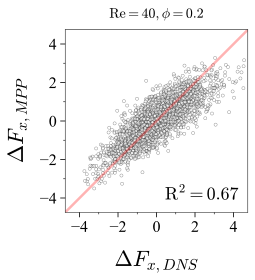

In [27]:
%reset -f array
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

# load dataset _______________________________________
dataset = pd.read_csv('../dataset/Re40_phi02',
                      header=None, delim_whitespace=True).values
X_in_phi02 = dataset[:2500, :np.size(dataset, axis=1) - 6]
Y_in_phi02 = dataset[:2500,  np.size(dataset, axis=1) - 3]
Y_in_phi02 -= np.mean(Y_in_phi02)

coord, title = 'F_x', '$ \mathrm{Re} = 40, \phi = 0.2 $'

kf = KFold(n_splits=5, shuffle=True)
train_scores = []
test_scores = []

print(X_in_phi02.shape)
print(f'# of included particles: {num_p_incl} out of {int((X_in_phi02.shape[1] - 3) / 3) + 1}')
print('________________________________________')

X_test_plot = np.zeros((0, X_in_phi02.shape[1]))
D_test_plot = np.zeros((0))
D_pred_plot = np.zeros((0))

# The cross-validation loop ________________________________
for train_index, test_index in kf.split(X_in_phi02):
    
    X_phi02, X_test_phi02 = X_in_phi02[train_index], X_in_phi02[test_index]
    Y_phi02, Y_test_phi02 = Y_in_phi02[train_index], Y_in_phi02[test_index]
    
    D_in_phi02 = Y_phi02

    q = -1

    kde_phi02 = []

    for condition_phi02 in [D_in_phi02 < -cond_factor * D_in_phi02.std(),
                            D_in_phi02 > +cond_factor * D_in_phi02.std()]:
        
        # Constructing KDEs ________________________________
        q += 1

        X1_tmp = np.array([])
        X2_tmp = np.array([])
        X3_tmp = np.array([])

        for p in range(0, num_p_incl):
            X1, X2, X3 = X_phi02[:, 3*p], X_phi02[:, 3*p+1], X_phi02[:, 3*p+2]
            X1_tmp = np.append(X1_tmp, X1[condition_phi02])
            X2_tmp = np.append(X2_tmp, X2[condition_phi02])
            X3_tmp = np.append(X3_tmp, X3[condition_phi02])
        
        data = np.vstack([X1_tmp, X2_tmp, X3_tmp])
        
        # KDE from scipy.stats _________________________
        from scipy.stats import gaussian_kde
        kde_phi02.append(gaussian_kde(data))
        bw = bw_scipy * kde_phi02[q].scotts_factor()
        kde_phi02[q].set_bandwidth(bw)
            
    # Constructing input variables ____________________________
    F_l = np.zeros((X_phi02.shape[0], 0))
    F_h = np.zeros((X_phi02.shape[0], 0))
    
    for j in range(0, num_p_incl):
        F_l = np.append(F_l, kde_phi02[0]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ]).reshape(-1,1), axis=1)
        F_h = np.append(F_h, kde_phi02[1]([ X_phi02[:, 3*j], X_phi02[:, 3*j+1], X_phi02[:, 3*j+2] ]).reshape(-1,1), axis=1)
    
    V_in_phi02 = X_phi02[:, -3:]
    
    X_in_reg = np.hstack((F_l, F_h, V_in_phi02))
    
    # Linear model __________________________________________________
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(normalize=False, fit_intercept=False)
       
    reg.fit(X_in_reg, D_in_phi02)
    D_pred = reg.predict(X_in_reg)  
    
    print(f'Training R^2\t= {r2_score(D_in_phi02, D_pred):.2f}')
    train_scores.append(r2_score(D_in_phi02, D_pred))
    
    # Testing _______________________________________________________________
    X = X_test_phi02
    D_in = Y_test_phi02
    
    F_l = np.zeros((X.shape[0], 0))
    F_h = np.zeros((X.shape[0], 0))

    for j in range(0, num_p_incl):
        F_l = np.append(F_l, kde_phi02[0]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).reshape(-1,1), axis=1)
        F_h = np.append(F_h, kde_phi02[1]([ X[:, 3*j], X[:, 3*j+1], X[:, 3*j+2] ]).reshape(-1,1), axis=1)

    V_in_phi02 = X[:, -3:]
    
    X_in_reg = np.hstack((F_l, F_h, V_in_phi02))
    
    D_pred_test = reg.predict(X_in_reg)
    
    print(f'Test R^2 \t= {r2_score(D_in, D_pred_test):.2f}\n')
    test_scores.append(r2_score(D_in, D_pred_test))
    
    # dataset for plotting all the tests together
    X_test_plot = np.vstack((X_test_plot, X_test_phi02))
    D_test_plot = np.concatenate((D_test_plot, Y_test_phi02))
    D_pred_plot = np.concatenate((D_pred_plot, D_pred_test))

# Entire dataset ________________________
X = X_test_plot
D_in = D_test_plot
D_pred = D_pred_plot

print(f'<Training R^2> = {np.mean(train_scores):.2f}')
print(f'<Test R^2> = {np.mean(test_scores):.2f}')

# plotting __________________________
plot_regression(D_in=D_in, D_pred=D_pred, coord=coord, title=title, save_fig=False)

## Coefficients

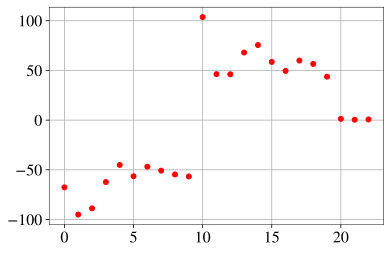

In [112]:
plt.plot(reg.coef_, linewidth=0, marker='.', color='red', markersize=10)
plt.grid()

## Visual comparison between true and interpolated PDFs for $ \phi = 0.2 $

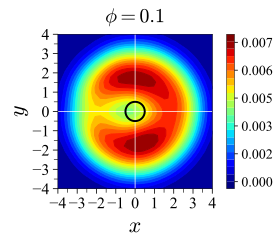

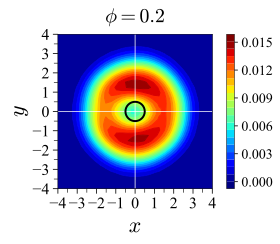

In [59]:
levels = 20
lim = 4

grid_n = 30j

xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])

ff = np.reshape(kde_phi01[1](mesh).T, xx.shape)
plot_PDF(xx, yy, ff, title='$ \phi = 0.1 $')

ff = np.reshape(kde_phi02[1](mesh).T, xx.shape)
plot_PDF(xx, yy, ff, title='$ \phi = 0.2 $')

ff = np.reshape(kde_phi04[1](mesh).T, xx.shape)
plot_PDF(xx, yy, ff, title='$ \phi = 0.4 $')

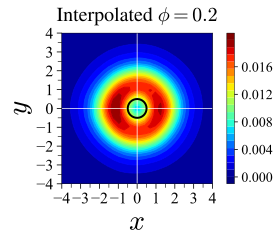

In [62]:
levels = 20
lim = 4

grid_n = 30j

xx, yy, zz = np.mgrid[-lim:lim:grid_n, -lim:lim:grid_n, -lim:lim:grid_n]
mesh = np.vstack([xx.flatten(), yy.flatten(), zz.flatten()])

ff = np.reshape(0.5 * (kde_phi01[0](mesh) + kde_phi04[0](mesh)).T, xx.shape)
plot_PDF(xx, yy, ff, title='Interpolated $ \phi = 0.2 $')

ff = np.reshape(kde_phi02[0](mesh).T, xx.shape)
plot_PDF(xx, yy, ff, title='True $ \phi = 0.2 $')